#  Spotify - AI in Business

#  Problem Statement 
The goal is to predict whether a particular user will skip individual tracks during a listening session. 

To do so, detailed information about the first half of a user's listening session is provided, with the prediction taking place on the second half. Furthermore, track characteristics such as flatness, energy, bounciness, and acousticness have been recorded in a separate data set.

In [1]:
#Importing all the necessary libraries for data manipulation
import pandas as pd
import numpy as np
import math

# Importing the Datasets

In [2]:
df = pd.read_csv('log_mini.csv') #reading the user session csv file
tf = pd.read_csv('tf_mini.csv')#reading the csv file having track features

In [3]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


Creating the training and test set from the above user information dataframe (as per the problem statement).

In [4]:
#The first set is the training set
l=[]
for i in range(0,len(df)-1):
    if df.loc[i,'session_position']<math.floor((df.loc[i,'session_length']/2)+1):
        l.append(df.loc[i,:])
train_df = pd.DataFrame(l)
#Second one is the test set
t=[]
for i in range(0,len(df)-1):
    if df.loc[i,'session_position']>math.floor((df.loc[i,'session_length']/2)):
        t.append(df.loc[i,:])
test_df = pd.DataFrame(t)

# Merging the Datasets

In [5]:
new_train_df = train_df.merge(tf, left_on='track_id_clean', right_on='track_id')
new_test_df = test_df.merge(tf, left_on='track_id_clean', right_on='track_id')

In [6]:
new_train_df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_01f86af2-cf48-42a6-9bf8-adb91f072909,7,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_02340c3b-c370-4c98-b759-87be85e11aa3,8,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_02a8ebbd-5a12-4343-a7da-2ea912102f90,2,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [7]:
new_test_df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,11,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
1,0_0135ed47-ef0c-44a6-9280-f9cd48a86cc3,14,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,False,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
2,0_02ff7281-e36f-4bdc-bec2-ca654821c2b8,18,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
3,0_045e80a8-f9bd-4e44-94da-62a1f0e60b9d,15,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,False,True,True,False,0,0,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
4,0_04da0f43-b10d-4df1-a686-8c6b3e2d5324,15,17,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,1,0,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187


# Data Cleaning and preparing for the algorithm feed

In [8]:
new_train_df.drop(columns=['session_id', 'session_length', 'session_position', 'track_id_clean', 
                          'track_id'], inplace=True, axis=1)

In [9]:
#dropping other skip columns as "skip_2" is the primary outcome variable
new_train_df.drop(columns=['skip_1', 'skip_3', 'not_skipped'], inplace=True, axis=1)

In [10]:
#Dropping Date and release year columns
new_train_df.drop(columns=['date', 'release_year'], axis=1, inplace=True)

In [11]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82756 entries, 0 to 82755
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   skip_2                           82756 non-null  bool   
 1   context_switch                   82756 non-null  int64  
 2   no_pause_before_play             82756 non-null  int64  
 3   short_pause_before_play          82756 non-null  int64  
 4   long_pause_before_play           82756 non-null  int64  
 5   hist_user_behavior_n_seekfwd     82756 non-null  int64  
 6   hist_user_behavior_n_seekback    82756 non-null  int64  
 7   hist_user_behavior_is_shuffle    82756 non-null  bool   
 8   hour_of_day                      82756 non-null  int64  
 9   premium                          82756 non-null  bool   
 10  context_type                     82756 non-null  object 
 11  hist_user_behavior_reason_start  82756 non-null  object 
 12  hist_user_behavior

In [12]:
#Encoding all the columns having object datatype i.e. all categorical data
new_train_df = pd.get_dummies(new_train_df, columns=['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
                                     'mode'])

In [13]:
#Finally encoding boolean values to interger along with our outcome variable i.e. skip_2 - True being 1 and False being 0.
new_train_df['skip_2'] = new_train_df['skip_2'].astype(int)
new_train_df['hist_user_behavior_is_shuffle']=new_train_df['hist_user_behavior_is_shuffle'].astype(int)
new_train_df['premium'] = new_train_df['premium'].astype(int)

In [14]:
#Doing the above same procedure for the test set 
new_test_df.drop(columns=['session_id', 'session_length', 'session_position', 'track_id_clean', 
                          'track_id'], inplace=True, axis=1)
new_test_df.drop(columns=['skip_1', 'skip_3', 'not_skipped'], inplace=True, axis=1)
new_test_df.drop(columns=['date', 'release_year'], axis=1, inplace=True)
new_test_df = pd.get_dummies(new_test_df, columns=['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
                                     'mode'])
new_test_df['skip_2'] = new_test_df['skip_2'].astype(int)
new_test_df['hist_user_behavior_is_shuffle']=new_test_df['hist_user_behavior_is_shuffle'].astype(int)
new_test_df['premium'] = new_test_df['premium'].astype(int)

In [15]:
new_test_df

,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,mode_major,mode_minor
0,1,0,1,0,0,0,0,1,16,1,...,0,0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,8,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,1,18,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,1,1,0,0,0,15,1,...,0,0,0,0,1,0,0,0,0,1
4,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85118,0,0,1,0,0,0,0,1,22,1,...,0,0,0,0,0,0,0,1,1,0
85119,0,0,0,1,1,0,0,1,22,1,...,0,0,0,0,1,0,0,0,0,1
85120,1,0,0,1,1,0,0,1,22,1,...,0,0,0,0,1,0,0,0,1,0
85121,0,0,1,0,0,0,0,0,13,1,...,0,0,0,0,0,0,0,1,1,0


# Exploratory Data Analysis

In [16]:
df1=new_train_df[['skip_2','context_switch','no_pause_before_play','short_pause_before_play','long_pause_before_play']]

Text(0.5, 0, 'Count')

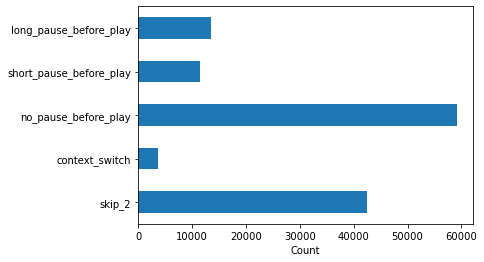

In [17]:
# The graph shows count of type of pause.
# Inference most people has not paused betweeen the songs which is generallly common practice followed 
# by individual.
ax=df1.sum().plot.barh()
ax.set_xlabel('Count')

Text(0.5, 1.0, 'No of user vs hour of the day')

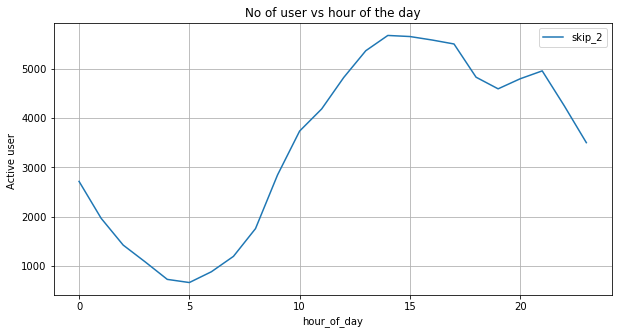

In [18]:
# No of user vs hour of the day
# Inference from the graph late in the evening is the most active user
import matplotlib.pyplot as plt
df2 = new_train_df.groupby('hour_of_day').count()
df2.plot( y=['skip_2'], figsize=(10,5), grid=True)
plt.ylabel("Active user ") 
plt.xlabel("hour_of_day")
plt.title("No of user vs hour of the day")

<AxesSubplot:xlabel='session_position'>

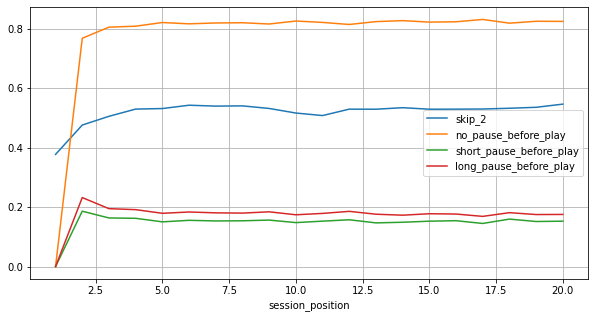

In [19]:
#Type of pause vs the session position
#Inference from the graph is that beginning session are generally listened uninterepted

df3=df.groupby('session_position').mean()#df is the inital dataframe defined at the start of the project
df3.plot( y=['skip_2','no_pause_before_play','short_pause_before_play','long_pause_before_play'], figsize=(10,5), grid=True)

In [20]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82756 entries, 0 to 82755
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   skip_2                                      82756 non-null  int32  
 1   context_switch                              82756 non-null  int64  
 2   no_pause_before_play                        82756 non-null  int64  
 3   short_pause_before_play                     82756 non-null  int64  
 4   long_pause_before_play                      82756 non-null  int64  
 5   hist_user_behavior_n_seekfwd                82756 non-null  int64  
 6   hist_user_behavior_n_seekback               82756 non-null  int64  
 7   hist_user_behavior_is_shuffle               82756 non-null  int32  
 8   hour_of_day                                 82756 non-null  int64  
 9   premium                                     82756 non-null  int32  
 10  duration  

# Feature Selection using Random Forest

In [21]:
# Importing all the necessary libraries for feature selection
# Feature selection is done on the training dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [22]:
#Spiltting the data into feature set and outcome variable
X = new_train_df.drop(columns=['skip_2'], axis=1)
X = X.values
y = new_train_df['skip_2']

In [23]:
# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
rfc.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(new_train_df.drop(columns=['skip_2']).columns, rfc.feature_importances_):
    print(feature)

('context_switch', 0.002813019141483164)
('no_pause_before_play', 0.01167558118463233)
('short_pause_before_play', 0.005183169033848563)
('long_pause_before_play', 0.005750805440782377)
('hist_user_behavior_n_seekfwd', 0.0030348756136198657)
('hist_user_behavior_n_seekback', 0.007999905486545788)
('hist_user_behavior_is_shuffle', 0.006380081978425023)
('hour_of_day', 0.038436677952232205)
('premium', 0.005782054569839963)
('duration', 0.01340395457103709)
('us_popularity_estimate', 0.012412491723930372)
('acousticness', 0.011433165135305755)
('beat_strength', 0.010865012800787452)
('bounciness', 0.010514082855316747)
('danceability', 0.010964501262195047)
('dyn_range_mean', 0.010656024852897654)
('energy', 0.011089620063045029)
('flatness', 0.011221199794367486)
('instrumentalness', 0.00715411318704969)
('key', 0.006960284485587076)
('liveness', 0.011949142201164328)
('loudness', 0.011548938772940926)
('mechanism', 0.011236283436164235)
('organism', 0.010930064024168325)
('speechiness'

In [24]:
# Create a SelecrFromModel object which will use Random Forest object rfc to select having a gini importance greater 
# than 0.012(threshold)
# Chose 0.012, as most of the features are within the range of 0.011.

sfm = SelectFromModel(rfc, threshold=0.012)
# Fit the model
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.012)

In [25]:
# Print the features that have gini importance greater than 0.012
for feature_list_index in sfm.get_support(indices=True):
    print((new_train_df.drop(columns=['skip_2']).columns)[feature_list_index])
# Collect the features in an empty list
l=[]
for feature_list_index in sfm.get_support(indices=True):
    l.append(list(new_train_df.drop(columns=['skip_2']).columns)[feature_list_index])

hour_of_day
duration
us_popularity_estimate
hist_user_behavior_reason_start_fwdbtn
hist_user_behavior_reason_start_trackdone
hist_user_behavior_reason_end_backbtn
hist_user_behavior_reason_end_endplay
hist_user_behavior_reason_end_fwdbtn
hist_user_behavior_reason_end_trackdone


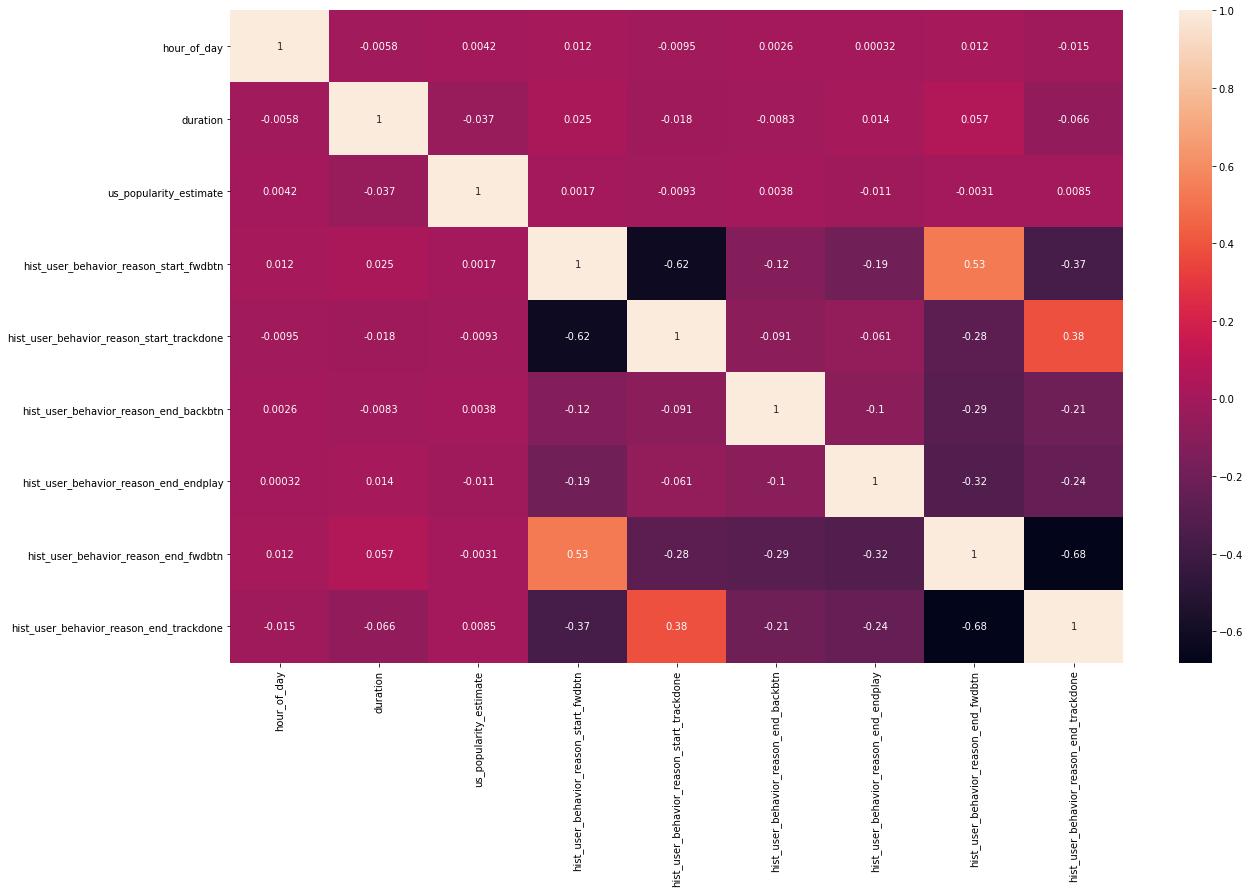

In [26]:
# Check whether the above features are correlated with one another. If so remove one of them
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(new_train_df[l].corr(), annot=True)
plt.show()

In [27]:
# 1) By looking at the heatmap,  
# 3) 'hist_user_behavior_reason_start_fwdbtn' and 'hist_user_behavior_reason_start_trackdone' are highly 
# inversely correlated, and so does 'hist_user_behavior_reason_end_fwdbtn' and 'hist_user_behavior_reason_end_trackdone' 
# so remove one from both.

unwanted = {'hist_user_behavior_reason_end_fwdbtn', 'hist_user_behavior_reason_start_fwdbtn'}
l = [e for e in l if e not in unwanted]

In [28]:
l

['hour_of_day',
 'duration',
 'us_popularity_estimate',
 'hist_user_behavior_reason_start_trackdone',
 'hist_user_behavior_reason_end_backbtn',
 'hist_user_behavior_reason_end_endplay',
 'hist_user_behavior_reason_end_trackdone']

In [29]:
# Subset the train and test set with the above features and initialize X_train, y_train, X_test, y_test
X_train = new_train_df[l]
y_train = new_train_df['skip_2']
X_test = new_test_df[l]
y_test = new_test_df['skip_2']

In [30]:
X_train.head()

,hour_of_day,duration,us_popularity_estimate,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_trackdone
0,16,180.066666,99.968133,1,0,0,1
1,21,180.066666,99.968133,1,0,0,1
2,11,180.066666,99.968133,0,0,0,0
3,15,180.066666,99.968133,0,0,0,0
4,15,180.066666,99.968133,1,0,0,0


In [31]:
# Scale the features as some feature columns have large values compared to others. For ex-'duration'

# Import necessary librabry for scaling
from sklearn.preprocessing import StandardScaler

# Initialize the object
ss = StandardScaler()

# Apply fit_transform for both X_train and X_test datasets
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#Now data is ready to be feed into different algorithms

# 1) Logistic Regression

In [32]:
# Importing all the necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression 

In [33]:
# Fit and find score and AUC on test set
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

print('\n Accuracy score of Logistic Regression on test data: {}'.format(LogReg.score(X_test, y_test)))


 Accuracy score of Logistic Regression on test data: 0.8814773915393019


# 2) LightGBM

In [34]:
# Importing all the necessary libraries for LightGBM model
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Fit and find score for LightGBM
model = LGBMClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8790573640496693


In [35]:
# Tuning the hyperparameters of LightGBM method using Optuna to obtain optimum values for the parameters of LightGBM
from optuna.integration import LightGBMPruningCallback
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("from lightgbm import LGBMClassifierdevice_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "binary_logloss")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

In [36]:
import optuna
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=20)

[I 2021-11-24 02:14:53,733] A new study created in memory with name: LGBM Classifier
C:\Users\aksha\anaconda3\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=11.023805562125744, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.023805562125744
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignore

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=11.023805562125744, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.023805562125744
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because thi

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 177 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 178 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 179 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 180 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 181 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 296 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 297 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 298 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 299 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 300 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 411 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 412 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 413 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 414 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 415 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 532 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 533 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 534 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 535 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 536 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 664 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 665 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 666 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 667 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 668 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 791 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 792 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 793 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 794 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 795 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 903 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 904 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 905 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 906 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 907 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1033 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1034 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1035 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1036 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1037 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored b

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `st

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=11.023805562125744, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.023805562125744
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because thi

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 180 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 181 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 182 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 183 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 184 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 287 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 288 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 289 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 290 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 291 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 409 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 410 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 411 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 412 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 413 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 533 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 534 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 535 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 536 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 537 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 661 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 662 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 663 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 664 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 665 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 795 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 796 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 797 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 798 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 799 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 920 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 921 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 922 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 923 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 924 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6000
[LightGBM] [Warning] min_gain_to_split is set=13.8000058220992, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.8000058220992
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignore

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6000
[LightGBM] [Warning] min_gain_to_split is set=13.8000058220992, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.8000058220992
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 124 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 125 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 126 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 127 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 128 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6000
[LightGBM] [Warning] min_gain_to_split is set=13.8000058220992, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.8000058220992
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `st

[I 2021-11-24 02:14:59,746] Trial 1 finished with value: 0.20152906661546943 and parameters: {'n_estimators': 10000, 'learning_rate': 0.204196956897633, 'num_leaves': 920, 'max_depth': 12, 'min_data_in_leaf': 6000, 'lambda_l1': 15, 'lambda_l2': 65, 'min_gain_to_split': 13.8000058220992, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.1876925633383465.
C:\Users\aksha\anaconda3\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
[LightGBM] [Warning] min_gain_to_split is set=9.340530455496848, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.340530455496848
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignore

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
[LightGBM] [Warning] min_gain_to_split is set=9.340530455496848, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.340530455496848
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because thi

C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignore

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
[LightGBM] [Warning] min_gain_to_split is set=9.340530455496848, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.340530455496848
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because thi

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 215 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 216 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 217 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 218 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 219 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=9000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9000
[LightGBM] [Warning] min_gain_to_split is set=3.3316984675428065, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3316984675428065
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignore

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=9000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9000
[LightGBM] [Warning] min_gain_to_split is set=3.3316984675428065, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3316984675428065
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 138 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 139 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 140 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 141 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 142 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=9000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9000
[LightGBM] [Warning] min_gain_to_split is set=3.3316984675428065, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3316984675428065
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `st

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 170 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 171 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 172 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 173 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 174 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

[I 2021-11-24 02:15:02,475] Trial 3 finished with value: 0.41550868971795535 and parameters: {'n_estimators': 10000, 'learning_rate': 0.21185521303450272, 'num_leaves': 940, 'max_depth': 10, 'min_data_in_leaf': 9000, 'lambda_l1': 60, 'lambda_l2': 80, 'min_gain_to_split': 3.3316984675428065, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.1876925633383465.
C:\Users\aksha\anaconda3\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of Ligh

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=4300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4300
[LightGBM] [Warning] min_gain_to_split is set=8.346596588002004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.346596588002004
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignore

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=4300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4300
[LightGBM] [Warning] min_gain_to_split is set=8.346596588002004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.346596588002004
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because thi

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=4300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4300
[LightGBM] [Warning] min_gain_to_split is set=8.346596588002004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.346596588002004
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `st

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 123 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 124 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 125 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 126 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 127 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

[I 2021-11-24 02:15:03,795] Trial 4 finished with value: 0.19486365644006967 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2316611607098709, 'num_leaves': 1020, 'max_depth': 12, 'min_data_in_leaf': 4300, 'lambda_l1': 90, 'lambda_l2': 55, 'min_gain_to_split': 8.346596588002004, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.1876925633383465.
C:\Users\aksha\anaconda3\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of Light

[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=4800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4800
[LightGBM] [Warning] min_gain_to_split is set=6.32934238945945, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.32934238945945
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-11-24 02:15:04,151] Trial 7 pruned. Trial was pruned at iteration 15.
C:\Users\aksha\anaconda3\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stop

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] min_gain_to_split is set=9.357990910973657, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.357990910973657
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because thi

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 150 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 151 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 152 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 153 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 154 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 240 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 241 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 242 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 243 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 244 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] min_gain_to_split is set=9.357990910973657, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.357990910973657
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because thi

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 145 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 146 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 147 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 148 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 149 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 232 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 233 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 234 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 235 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 236 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 328 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 329 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 330 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 331 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 332 is already reported.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored becaus

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=3900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3900
[LightGBM] [Warning] min_gain_to_split is set=6.954710202719167, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.954710202719167
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [37]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 0.18769
	Best params:
		n_estimators: 10000
		learning_rate: 0.05480819948919102
		num_leaves: 2560
		max_depth: 12
		min_data_in_leaf: 1100
		lambda_l1: 20
		lambda_l2: 50
		min_gain_to_split: 11.023805562125744
		bagging_fraction: 0.7
		bagging_freq: 1
		feature_fraction: 0.30000000000000004


In [39]:
model = LGBMClassifier(n_estimators=10000, learning_rate=0.054, num_leaves=2560, max_depth=12, min_data_in_leaf = 1100,
                      lambda_l1=20, lambda_l2=50, min_gain_to_split=11.0238, bagging_fraction=0.7, bagging_freq=1, feature_fraction=0.3)
model.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, feature_fraction=0.3,
               lambda_l1=20, lambda_l2=50, learning_rate=0.054, max_depth=12,
               min_data_in_leaf=1100, min_gain_to_split=11.0238,
               n_estimators=10000, num_leaves=2560)

In [41]:
model.score(X_test, y_test)



# It would be interesting to see what score ensembling above algorithms would give.

0.8802438823819649

# 3) Ensembling the above two algorithms

In [42]:
# Import the necessary library
from mlxtend.classifier import EnsembleVoteClassifier

# Fit and find the score
eclf1 = EnsembleVoteClassifier(clfs=[LogReg, model], weights=[1,1],voting='soft')
eclf1.fit(X_train,y_train)
 
print('\n Accuracy score of Ensemble Vote Classifier on test data: {}'.format(eclf1.score(X_test, y_test)))


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=11.0238, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.0238
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

 Accuracy score of Ensemble Vote Classifier on test data: 0.8816418594269468


# Recommendation System using KNN
The outcome of the system is to recommend songs to users based on the song features user prefer.

In [43]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.simplefilter("ignore")

In [44]:
tf = pd.read_csv('tf_mini.csv')
tf.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [45]:
tf['track_id'].nunique()==len(tf) # Checking whether number of songs is equal to length of the dataframe

True

In [46]:
l=[]
for i in range(len(tf)):
    l.append(i)
tf['Track_ID']=l
cols = tf.columns.tolist()
cols = cols[-1:] + cols[:-1]
tf=tf[cols]
tf.drop(columns=[ 'time_signature'], inplace=True)

In [47]:
tf['mode'].unique()

array(['major', 'minor'], dtype=object)

In [48]:
tf['mode']=tf['mode'].str.replace('major', '1')
tf['mode']=tf['mode'].str.replace('minor', '0')
tf['mode']=tf['mode'].astype(int)

In [49]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(tf.iloc[:, 5:])

In [50]:
def RecommendedSongs(neighbors,song_track):
    model=NearestNeighbors()
    model.fit(X)
    distance,indices=model.kneighbors(X[[song_track]], n_neighbors=neighbors)
    print(tf.iloc[indices[0],1])

In [51]:
RecommendedSongs(5,6)

6        t_20675f8a-3a40-40b8-aa9b-0ce64536c65b
13778    t_fd56355c-b066-4f85-b623-0e2e4dc85a93
83       t_037534ef-46bc-49d0-9706-84c942c0dc80
2342     t_05f3187b-6f50-4639-b9c7-773b790b98b5
18199    t_518e1262-7e92-428a-9c5a-26f1733f0286
Name: track_id, dtype: object


# Conclusion
1) To assist Spotify in predicting whether a user will skip a specific song in order to improve their recommendation system.

2) From the graph between Active users vs Hour of Day, Spotify marketing team could come up with better marketing strategy to increase the user traffic during the non-peak hours.

3) To enrich user experience by recommending similar songs based on user's listening history.

4) As LightGBM and Logistics Regression are giving similar results even after ensembling the two algorithms, it would be much wiser to go with Logistic Regression as it is less complex and computationaly less expensive.